In [1]:
import matplotlib
#matplotlib.use('nbagg')
#print(matplotlib.__version__)

import numpy as np
import matplotlib.pylab as plt


from matplotlib.ticker import FormatStrFormatter      # for ticks of histogram
from ipywidgets import interact, interactive, fixed   # for ipynb widgets
import ipywidgets as widgets                          # for ipynb widgets

#%matplotlib notebook

INPUT: enter the achieved percentages per student

In [2]:
ids_perc = np.random.random(33) 
print("number of entered marks: ", ids_perc.shape)

number of entered marks:  (33,)


In [24]:
# define possible marks
marks = np.array([1.0,
                  1.3,
                  1.7,
                  2.0,
                  2.3,
                  2.7,
                  3.0,
                  3.3,
                  3.7,
                  4.0,
                  5.0])
marks_possible = marks[::-1]

def get_perc_necessary(min_perc_one,
                       min_perc_four,
                       n_marks):
    """
    calculates an equally spaced array for percentage necessary to get a mark
    """
    delta = (min_perc_one - min_perc_four)/(n_marks-2-1)
    perc_necessary_raw = np.linspace(start=min_perc_four, 
                                     stop=min_perc_one, 
                                     num=n_marks-1)
    perc_necessary = np.append([0.0], np.round(perc_necessary_raw, decimals=2)) 
    return perc_necessary


def assign_marks(n_students,
                 perc_necessary,
                 achieved_perc,
                 marks_real):
    """
    get the mark for each student (with a certain achieved percentage)
    """
    final_marks = np.empty(n_students)

    for cur_i in range(n_students):
        condition = np.argwhere(perc_necessary <= achieved_perc[cur_i])
#         print("condition: ", condition)
        idx = np.argmax(condition)
#         print("idx: ", idx)
        final_marks[cur_i] = marks_real[idx]
    
    return final_marks
    

def get_marks(min_perc_four = 0.15,
              min_perc_one = 0.85,
              args = {'marks': marks_possible,
                      'ach_per' : ids_perc}
              ):

#     marks_real = args['argus'][1]
#     print('marks_real: ', marks_real)
#     achieved_perc = args['argus'][0]
#     print('achieved_perc: ', achieved_perc)

    marks_real = args['marks'] #  [0]
    achieved_perc = args['ach_per'] #  [0]
    
    n_marks = marks_real.shape[0]
    print("n_marks: ", n_marks)
    n_students = achieved_perc.shape[0]
    print("n_students: ", n_students)
    
    # -----------------------------
    # linear step between each mark
    perc_necessary = get_perc_necessary(min_perc_one,
                                        min_perc_four,
                                        n_marks)

    # test query: there need to be as many percentages as marks
    if perc_necessary.shape[0] != marks_real.shape[0]:
        print("the number of marks has to be equal the number of boundaries")
        raise Exception

    # ------------
    # assign marks 
    final_marks = assign_marks(n_students,
                               perc_necessary,
                               achieved_perc,
                               marks_real)    
    
    # ------------
    # create table
    fig, ax = plt.subplots()
    N, bins, patches = ax.hist(final_marks, 
                               align='mid', 
                               bins=np.append(marks,6.)) # bins=marks
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    ax.set_xticks(bin_centers)
    ax.set_xticklabels( marks )
    ax.set_xlabel("mark")
    ax.set_ylabel("number of marks")
    ax.set_ylim(0.0, 6.0)
    plt.grid(True)
    
# def wrapper_for_get_marks(min_perc_four = 0.15,
#                           min_perc_one = 0.85):
    
#     get_marks(achieved_perc = ids_perc,
#               marks_real = marks_possible,                    
#               min_perc_four = 0.15,
#               min_perc_one = 0.85)

n_marks:  11
n_students:  33


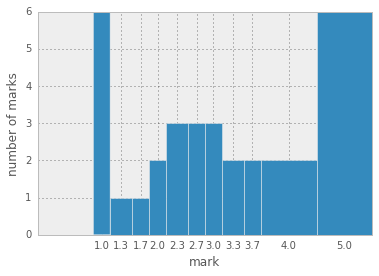

In [25]:
get_marks(min_perc_four=0.2,
          min_perc_one=0.8)

In [27]:
interact(get_marks, 
         min_perc_four=(0.2, 0.4, 0.05),
         min_perc_one=(0.75, 0.95, 0.05));

/Users/claushaslauer/anaconda/envs/py35/lib/python3.5/site-packages/ipywidgets/widgets/widget_selection.py:98: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.value not in self._options_values:
/Users/claushaslauer/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/traitlets.py:540: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
def calc_b(v1, v2):
    return v1 + v2

def calc_c(v1, v2, v3):
    return [v1, v2, v3]

def make_figure(const_1=1, const_2=2, var_1=0.4, var_2=0.8):
    b = calc_b(var_1, var_2)
    c = calc_c(b, const_1, const_2)
    fig, ax = plt.subplots()
    N, bins, patches = ax.hist(c)

interact(make_figure, 
         var_1=(0.2, 0.4, 0.05),
         var_2=(0.75, 0.95, 0.05));

In [ ]:
#     print("delta:  ", delta)
#     print("% necs: ", perc_necessary)
#     print("marks:  " , marks_real)

#     print("shape   % necs: ", perc_necessary.shape)
#     print("shape marks_real", marks_real.shape)


#         up = idx+1
#         if idx == 10:
#             up = idx

#         print ("%3i \t %3.2f \t %3.2f \t %3.2f \t %3.2f \t %3i \t %i" % (cur_i, 
#                                                             achieved_perc[cur_i,1], 
#                                                             perc_necessary[idx], 
#                                                             perc_necessary[up], 
#                                                             marks_real[idx],
#                                                             idx,
#                                                             achieved_perc[cur_i,0]))
    # print("These are the final marks achieved:")
    # print(final_marks)
    
    
    #     print("\ntable of points achieved per student and resulting mark")
#     print ("id \t % ach \t %low \t %up \t mark \t idx \t StudentID")

#     print("mark, number of that mark")
#     for i in range(n_marks):
#         print (bins[i], N[i])
        
    #return fig
    
    
    #     if np.sum(N) != achieved_perc.shape[0]:
#         print("Something is wrong!")
#         raise Exception

#     ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
#     bin_centers = 0.5 * np.diff(bins) + bins[:-1]
#     ax.set_xticks(bin_centers)
#     ax.set_xticklabels( marks )
#     ax.set_xlabel("mark")
#     ax.set_ylabel("number of marks")
#     ax.set_ylim(0.0, 6.0)
#     plt.grid(True)